# Allowing single clusters (or not)

By default HDBSCAN\* does not allow for single clusters. This is because the root cluster has a tendency to dominate, and thus is often returned as a sole cluster. However this can have some less than satisfactory side-effects. In particular if there really only is a single cluster, or the data has no clusters, then we can get confusing results tat pick out many small areas of slightly higher density.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import hdbscan
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('poster')

In [2]:
np.random.seed(3)

In [3]:
uniform = np.random.uniform(size=(2000, 2))
gaussian, _ = make_blobs(n_samples=2000, n_features=2, centers=1)

We cluster, both without, and with the ``allow_single_cluster`` option enabled, and then visualise the results in a grid. As can be seen, the option to allow single clusters can be valuable.

In [4]:
uniform_labels1 = hdbscan.HDBSCAN().fit_predict(uniform)
uniform_labels2 = hdbscan.HDBSCAN(allow_single_cluster=True).fit_predict(uniform)
gaussian_labels1 = hdbscan.HDBSCAN().fit_predict(gaussian)
gaussian_labels2 = hdbscan.HDBSCAN(allow_single_cluster=True).fit_predict(gaussian)

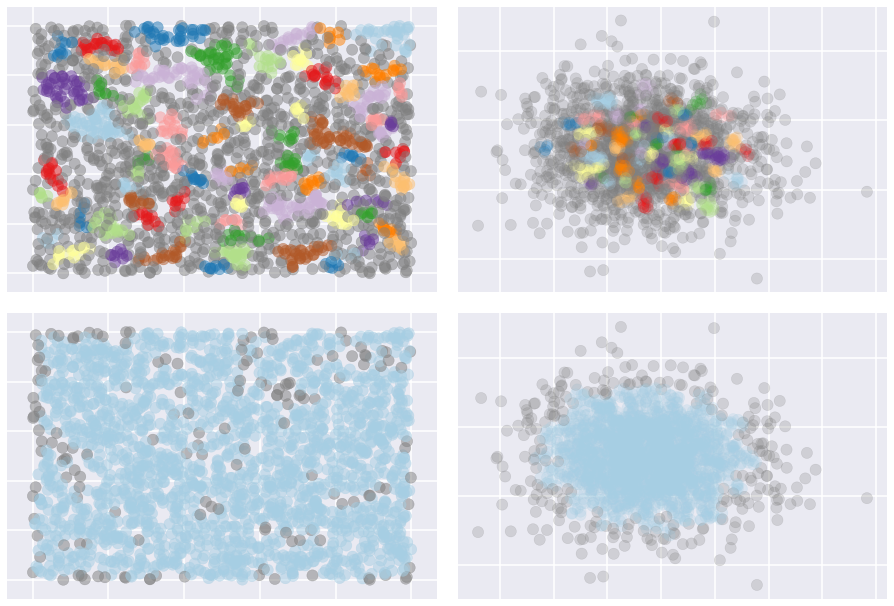

In [5]:
fig = plt.figure()
gs = plt.GridSpec(4,4)

ax1 = plt.subplot(gs[0:2,0:2])
pal = sns.color_palette('Paired', np.max(uniform_labels1) + 1)
colors = [pal[x] if x >= 0 else (0.5, 0.5, 0.5) for x in uniform_labels1]
ax1.scatter(*uniform.T, alpha=0.5, c=colors)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

ax2 = plt.subplot(gs[2:4,0:2])
pal = sns.color_palette('Paired', np.max(uniform_labels2) + 1)
colors = [pal[x] if x >= 0 else (0.5, 0.5, 0.5) for x in uniform_labels2]
ax2.scatter(*uniform.T, alpha=0.5, c=colors)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot(gs[0:2,2:4])
pal = sns.color_palette('Paired', np.max(gaussian_labels1) + 1)
colors = [pal[x] if x >= 0 else (0.5, 0.5, 0.5) for x in gaussian_labels1]
ax3.scatter(*gaussian.T, alpha=0.25, c=colors)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = plt.subplot(gs[2:4,2:4])
pal = sns.color_palette('Paired', np.max(gaussian_labels2) + 1)
colors = [pal[x] if x >= 0 else (0.5, 0.5, 0.5) for x in gaussian_labels2]
ax4.scatter(*gaussian.T, alpha=0.25, c=colors)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

plt.tight_layout()

plt.savefig('single_cluster_comparison.png')